In [8]:
#importa
import torch 
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
import scipy
import seaborn
import matplotlib.pyplot as plt
from scipy.special import softmax
import torch
import torch.nn as nn
import pickle as pkl
import gzip
from nltk import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import json
import pandas as pd
import os 
import numpy as np
import joblib 
from sklearn.pipeline import Pipeline
from sklearn import naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import math
from torch.utils.data import TensorDataset, DataLoader
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax
seed = 1234
data_path = '../Cleaned_data/final/'

In [9]:
os.listdir(data_path)

['amazon_reviews.csv',
 'kindle_reviews.csv',
 'steam_reviews.csv',
 'imdb_reviews.csv',
 'wine_reviews.csv',
 'hotel_reviews.csv',
 'disneyland_reviews.csv']

## Creating baseline models
- Multinomial Naive Bayes
- Logistic Regression model
- Everything is based on Vectorized TF-IDs for sentences. 

In [14]:
tokenizer = TweetTokenizer()
lr = []
nb = []
data2 = pd.read_csv('../Cleaned_data/final/kindle_reviews.csv')
data2.dropna(inplace=True)
data2['text'] = [entry.lower() for entry in data2['text']]
data2['text'] = [tokenizer.tokenize(sen) for sen in data2['text']]
data2 ['text'] = [str(sen) for sen in data2['text']]
_, X_test, _, y_test = train_test_split(data2['text'], data2['label'], test_size = 0.2, random_state = seed)
Naive = naive_bayes.MultinomialNB()
model = LogisticRegression(random_state =seed, max_iter = 1000)
scaler = StandardScaler(with_mean=False)
for i in os.listdir(data_path):
    if i not in ['kindle_reviews.csv', 'amazon_reviews.csv']:
        print(f'Now using {i} as training data--------------' )
        data = pd.read_csv(f'{data_path}{i}')
        data.dropna(inplace=True)
        data['text'] = [entry.lower() for entry in data['text']]
        data ['text'] = [str(sen) for sen in data['text']]
        X_train = data['text']
        y_train = data['label']
        X_train = [tokenizer.tokenize(sen) for sen in X_train]
        X_train = [str(sen) for sen in X_train]
        Tfidf_vect = TfidfVectorizer(max_features=5000)
        Train_X_Tfidf = scaler.fit_transform(Tfidf_vect.fit_transform(X_train))
        Test_X_Tfidf = scaler.fit_transform(Tfidf_vect.transform(X_test))
        # fit the training dataset on the NB classifier
        Naive.fit(Train_X_Tfidf,y_train)
        model.fit(Train_X_Tfidf,y_train)
        # predict the labels on validation dataset
        predictions_NB = Naive.predict(Test_X_Tfidf)
        preds = model.predict(Test_X_Tfidf)
        # Use accuracy_score function to get the accuracy
        print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)
        nb.append((i,accuracy_score(predictions_NB,y_test)))
        print("Logistic Regression Accuracy Score -> ",accuracy_score(preds, y_test)*100, '\n\n\n')
        lr.append((i,accuracy_score(preds,y_test)))
    else:
        pass

Now using steam_reviews.csv as training data--------------
Naive Bayes Accuracy Score ->  73.0
Logistic Regression Accuracy Score ->  70.0 



Now using imdb_reviews.csv as training data--------------
Naive Bayes Accuracy Score ->  75.5
Logistic Regression Accuracy Score ->  81.0 



Now using wine_reviews.csv as training data--------------
Naive Bayes Accuracy Score ->  62.0
Logistic Regression Accuracy Score ->  62.5 



Now using hotel_reviews.csv as training data--------------
Naive Bayes Accuracy Score ->  65.5
Logistic Regression Accuracy Score ->  63.0 



Now using disneyland_reviews.csv as training data--------------
Naive Bayes Accuracy Score ->  74.0
Logistic Regression Accuracy Score ->  65.5 





In [27]:
nb_res = []
lr_res = []
for i, j in nb:
    nb_res.append(j)
for i, j in lr:
    lr_res.append(j)
nb_res = softmax(np.array(nb_res))
lr_res = softmax(np.array(lr_res))
nb_dict = {}
lr_dict = {}
for i, j in zip(nb, nb_res):
    nb_dict[i[0]] = round(5000*j,0)
for i, j in zip(lr, lr_res):
    lr_dict[i[0]] =  round(5000*j,0)
    
print(nb_dict)
print(lr_dict)

{'steam_reviews.csv': 1029.0, 'imdb_reviews.csv': 1055.0, 'wine_reviews.csv': 922.0, 'hotel_reviews.csv': 955.0, 'disneyland_reviews.csv': 1039.0}
{'steam_reviews.csv': 1014.0, 'imdb_reviews.csv': 1132.0, 'wine_reviews.csv': 940.0, 'hotel_reviews.csv': 945.0, 'disneyland_reviews.csv': 969.0}


In [28]:
'''We set a training limit of 5000 sentences, because of training and data limitations.'''
datasets = ['imdb', 'steam_reviews', 'hotels', 'wine', 'disneyland']
data_dict = {}

for idx, dataset in enumerate(os.listdir(data_path)):
    data_dict[dataset] = pd.read_csv(f'{data_path}{dataset}')
nb_df = {}
print(data_dict.keys())
for i in data_dict:
    if i not in ['kindle_reviews.csv', 'amazon_reviews.csv']:
        nb_df[i] = data_dict[i].sample(n = int(nb_dict[i]), random_state=seed)
lr_df = {}
for i in data_dict:
    if i not in ['kindle_reviews.csv', 'amazon_reviews.csv']:
        lr_df[i] = data_dict[i].sample(n = int(lr_dict[i]), random_state=seed)


dict_keys(['amazon_reviews.csv', 'kindle_reviews.csv', 'steam_reviews.csv', 'imdb_reviews.csv', 'wine_reviews.csv', 'hotel_reviews.csv', 'disneyland_reviews.csv'])


In [30]:
NB_synth = pd.concat([nb_df['imdb_reviews.csv'],nb_df['steam_reviews.csv'],nb_df['disneyland_reviews.csv'],nb_df['wine_reviews.csv'],nb_df['hotel_reviews.csv']], ignore_index=True).sample(frac=1, random_state=seed)
LR_synth = pd.concat([lr_df['imdb_reviews.csv'],lr_df['steam_reviews.csv'],lr_df['disneyland_reviews.csv'],lr_df['wine_reviews.csv'],lr_df['hotel_reviews.csv']], ignore_index=True).sample(frac=1, random_state=seed)

print('# pos labels:',sum(LR_synth['label']),'\n# neg labels:',len(LR_synth)- sum(LR_synth['label']), '\n')
print('# pos labels:',sum(NB_synth['label']),'\n# neg labels:',len(NB_synth)- sum(NB_synth['label']))

# pos labels: 4016 
# neg labels: 984 

# pos labels: 4037 
# neg labels: 963


In [31]:
NB_synth.to_csv('synthesized_data/NB_data.csv', index=False)
LR_synth.to_csv('synthesized_data/LR_data.csv', index=False)

## Second Baseline: 
- We wanted to also allocate sentences based on the softmaxed accuracy scores for our baseline models

In [32]:
# Section for JS divergence 
sorted(os.listdir('../Cleaned_data/final/'))

['amazon_reviews.csv',
 'disneyland_reviews.csv',
 'hotel_reviews.csv',
 'imdb_reviews.csv',
 'kindle_reviews.csv',
 'steam_reviews.csv',
 'wine_reviews.csv']

In [33]:
js = scipy.spatial.distance.jensenshannon

imdb = pd.read_csv('../Cleaned_data/final/imdb_reviews.csv')
steam = pd.read_csv('../Cleaned_data/final/steam_reviews.csv')
hotels = pd.read_csv('../Cleaned_data/final/hotel_reviews.csv')
steam = steam.drop(steam[steam.label == 'null'].index)
hotels = hotels.drop(hotels[hotels.label == 'null'].index)
wine = pd.read_csv('../Cleaned_data/final/wine_reviews.csv')
disneyland = pd.read_csv('../Cleaned_data/final/disneyland_reviews.csv')
kindle = pd.read_csv('../Cleaned_data/final/kindle_reviews.csv')
wine = wine.drop(wine[wine.label == 'null'].index)
disneyland = disneyland.drop(disneyland[disneyland.label == 'null'].index)
hotels.name = 'hotels'
steam.name = 'steam'
imdb.name = 'imdb'
disneyland.name = 'disneyland'
wine.name = 'wine'
steam.head()

,text,label
0,"I was just having a casual day, you know, usin...",1
1,"If I'm gonna die, I'm gonna die historic in th...",1
2,Will pay for another mountain so my mountain c...,1
3,Not worth the price. Frustrating matchmaking a...,0
4,I enjoyed both this and the second game. Same ...,1


In [35]:
imdb_text = imdb['text']
wine_text = wine['text']
disneyland_text = disneyland['text']
steam_text = steam['text']
hotels_text = hotels['text']
kindle_text = kindle['text']

In [36]:
datasets = [imdb_text, steam_text, wine_text, hotels_text, disneyland_text, kindle_text]
w2idx = {}
idx2w = {}
tokenizer = TweetTokenizer()
bruh = {}
wc = 0
for idx, data_text in enumerate(datasets):
    word_counts = [0 for i in range(1000000)]
    for line_idx, line in enumerate(data_text):
        if type(line) == str:
            for word in tokenizer.tokenize(line):
                if word not in w2idx:
                    w2idx[word] = wc
                    idx2w[wc] = word
                    word_counts[wc] = 1
                    wc+=1
                else:
                    try: 
                        word_counts[w2idx[word]] += 1
                    except:
                        pass
    bruh[idx] = word_counts

In [37]:
counter = 1
arr = np.zeros((6, 6))
for i in bruh.keys():
    print(f'loop number: {counter}')
    for j in bruh.keys():
        arr[i,j] = js(np.array(bruh[i]), (bruh[j]))
    counter +=1
print(arr)

loop number: 1
loop number: 2
loop number: 3
loop number: 4
loop number: 5
loop number: 6
[[0.         0.34980431 0.45952835 0.44786086 0.39955701 0.33330789]
 [0.34980431 0.         0.42655173 0.434521   0.37765442 0.36447711]
 [0.45952835 0.42655173 0.         0.43695849 0.42090844 0.42975228]
 [0.44786086 0.434521   0.43695849 0.         0.35178323 0.43376445]
 [0.39955701 0.37765442 0.42090844 0.35178323 0.         0.39716401]
 [0.33330789 0.36447711 0.42975228 0.43376445 0.39716401 0.        ]]


In [38]:
#print(arr)
av_dists = []
for i in arr:
    #print(np.sum(i)/4)
    av_dists.append(np.sum(i)/4)

In [39]:
#for i, j in zip(datasets1, av_dists):
#    print(f'Average distance to {i}: {j.round(4)}')
arr2 = np.zeros((6,7))
for i in bruh.keys():
    for j in bruh.keys():
        arr2[i,j] = js(np.array(bruh[i]), (bruh[j]))
for j in range(len(av_dists)):
    arr2[j, 6] = av_dists[j]

<AxesSubplot:title={'center':'Jensen-Shannon distance between domains'}>

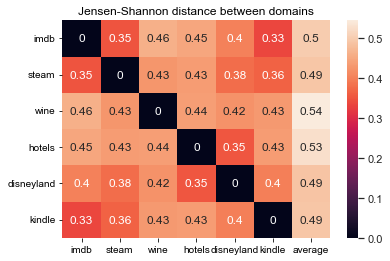

In [40]:
datasets1 = ['imdb', 'steam', 'wine', 'hotels', 'disneyland','kindle', 'average']
ax = plt.axes()
seaborn.set(rc = {'figure.figsize':(10,7)})
ax.set_title('Jensen-Shannon distance between domains')
seaborn.heatmap(arr2, xticklabels=datasets1, yticklabels=datasets1[:-1], annot=True)

In [57]:
l = []
for i in arr[:-1,5]:
    print(i)
    l.append(1-i)
JS_dict = {}
for i, j in zip(list(nb_dict.keys()),softmax(np.array(l))):
    print(i, j)
    JS_dict[i] = round(5000*j,0)
for i in JS_dict:
    print(i, JS_dict[i])
JS_df = {}
for i in data_dict.keys():
    if i not in ['amazon_reviews.csv','kindle_reviews.csv']:
        JS_df[i] = data_dict[i].sample(n = int(JS_dict[i]), random_state=seed)
JS_synth = pd.concat([JS_df['imdb_reviews.csv'],JS_df['steam_reviews.csv'],JS_df['disneyland_reviews.csv'],JS_df['wine_reviews.csv'],JS_df['hotel_reviews.csv']], ignore_index=True).sample(frac=1, random_state=seed)
print('# pos labels:',sum(JS_synth['label']),'\n# neg labels:',len(JS_synth)- sum(JS_synth['label']))

0.33330788598701677
0.3644771064384126
0.42975228165000745
0.4337644542244076
0.39716400848455524
steam_reviews.csv 0.21186726700951247
imdb_reviews.csv 0.20536538513638222
wine_reviews.csv 0.19238827274698914
hotel_reviews.csv 0.19161792421445692
disneyland_reviews.csv 0.19876115089265908
steam_reviews.csv 1059.0
imdb_reviews.csv 1027.0
wine_reviews.csv 962.0
hotel_reviews.csv 958.0
disneyland_reviews.csv 994.0
# pos labels: 4044 
# neg labels: 956


In [51]:
JS_synth.to_csv('synthesized_data/JS_data.csv', index=False)

In [52]:
all_dict = {}
for i in data_dict.keys():
    all_dict[i] = data_dict[i].sample(n = 1000, random_state=seed)
all_df = JS_synth = pd.concat([all_dict['imdb_reviews.csv'],all_dict['steam_reviews.csv'],all_dict['disneyland_reviews.csv'],all_dict['wine_reviews.csv'],all_dict['hotel_reviews.csv']], ignore_index=True).sample(frac=1, random_state=seed)

In [54]:
all_df.to_csv('synthesized_data/equal_amounts.csv')

## Computing pos/neg for new datasets


In [55]:
print('# pos labels:',sum(all_df['label']),'\n# neg labels:',len(all_df)- sum(all_df['label']))

# pos labels: 4061 
# neg labels: 939
